### Stage

- [x] Implementation
- [ ] Optimization
- [ ] Cleaning

### Imports

In [314]:
from csv         import reader
from math        import sqrt, floor
from collections import Counter
from statistics  import fmean, stdev, correlation

### Data preparation

In [315]:
with open("./data/computer-sales.csv", newline="") as csvfile:
    spamreader = reader(csvfile, delimiter=",", quotechar="|")
    
    # Converting '_csv.reader' to 'list'
    raw_sales_data = list(spamreader)

    print("First 5 rows:")
    for row in raw_sales_data[:5]:
        print(row)


col_len = len(raw_sales_data[0])
row_len = len(raw_sales_data)
print(f"\nRows: {row_len}, Columns: {col_len}")


First 5 rows:
['Sale ID', 'Company', 'Contact', 'Contact Sex', 'Contact Age', 'Contact City', 'Contact State', 'Product Company', 'Product ID', 'Product Type', 'Sale Price', 'Our Cost', 'Shipping Cost', 'Profit', 'Lead Source', 'Sale Month', 'Sale Year']
['1', 'PNT Designs', 'Paul Thomas', 'M', '43', 'Carnegie', 'OH', 'HP', 'M01-F0024', 'Desktop', '479.99', '315.50', '21.10', '143.39', 'Website', 'January', '2018']
['2', 'Ace Manufacturing', 'Margo Simms', 'F', '37', 'Larimer', 'WV', 'HP', 'GT13-0024', 'Desktop', '1249.99', '998.00', '21.10', '230.89', 'Flyer 4', 'January', '2018']
['3', "Sammie's", 'Sam Stine', 'M', '26', 'Pittsburgh', 'PA', 'Dell', 'I3670', 'Desktop', '649.99', '510.25', '21.10', '118.64', 'Website', 'February', '2018']
['4', 'One Moe Time', 'Moe Eggert', 'M', '35', 'St. Clair', 'PA', 'Dell', 'I3593', 'Laptop', '399.99', '310.50', '17.40', '72.09', 'Website', 'March', '2018']

Rows: 40, Columns: 17


In [316]:
# Getting the header
sales_data = {i: [] for i in raw_sales_data[0]}
sales_data

{'Sale ID': [],
 'Company': [],
 'Contact': [],
 'Contact Sex': [],
 'Contact Age': [],
 'Contact City': [],
 'Contact State': [],
 'Product Company': [],
 'Product ID': [],
 'Product Type': [],
 'Sale Price': [],
 'Our Cost': [],
 'Shipping Cost': [],
 'Profit': [],
 'Lead Source': [],
 'Sale Month': [],
 'Sale Year': []}

In [317]:
# Accessing nth key in the dictionary
def get_nth_key(dictionary, n=0):
    if n < 0: # negative indexing
        n += len(dictionary)
    for i, key in enumerate(dictionary):
        if i == n:
            return key
    raise IndexError("Dictionary index out of range")

idx = 1
print(f"Getting index-{idx}: {get_nth_key(sales_data, idx)}")

Getting index-1: Company


In [318]:
# Making sales_data_list to a dictionary
for col in range(col_len):
    for row in range(1, row_len):
        val = raw_sales_data[row][col]
        sales_data[get_nth_key(sales_data, col)].append(val)

sales_data

{'Sale ID': ['1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39'],
 'Company': ['PNT Designs',
  'Ace Manufacturing',
  "Sammie's",
  'One Moe Time',
  'Get Going Gym',
  'ANX Trucking',
  'Samms Grooming',
  'Roberts Produce',
  'Klondike Dairy',
  'Jones Manufacturing',
  'James Cycles',
  'Weight Stalkers',
  'Case Solutions',
  "Doug's House",
  'Helms Manufacturing',
  'Collins Advertising',
  'Owens & Sons',
  'Samms Grooming',
  'Roberts Produce',
  'ANX Trucking',
  'Case Solutions',
  "Doug's House",
  'PNT Designs',
  'Ace Manufacturing',
  'Samms Grooming',
  'Roberts Produce',
  'Klondike Dairy',
  'One Moe Time',
  'Get Going Gym',
  'Jones Manufacturing',
  'James Cycles',
  'Weight Stalkers',
  'Collins Advertising',
  'Owens &

In [319]:
# Accessing nth key's value in the dictionary
def get_nth_value(dictionary, idx):
    return dictionary[get_nth_key(dictionary, idx)]

idx = 1
print(get_nth_value(sales_data, idx))

# NOTE: Alternative
# sales_data["Company"]

['PNT Designs', 'Ace Manufacturing', "Sammie's", 'One Moe Time', 'Get Going Gym', 'ANX Trucking', 'Samms Grooming', 'Roberts Produce', 'Klondike Dairy', 'Jones Manufacturing', 'James Cycles', 'Weight Stalkers', 'Case Solutions', "Doug's House", 'Helms Manufacturing', 'Collins Advertising', 'Owens & Sons', 'Samms Grooming', 'Roberts Produce', 'ANX Trucking', 'Case Solutions', "Doug's House", 'PNT Designs', 'Ace Manufacturing', 'Samms Grooming', 'Roberts Produce', 'Klondike Dairy', 'One Moe Time', 'Get Going Gym', 'Jones Manufacturing', 'James Cycles', 'Weight Stalkers', 'Collins Advertising', 'Owens & Sons', 'Samms Grooming', 'ANX Trucking', 'Case Solutions', "Doug's House", 'One Moe Time']


In [320]:
# Converting columns to appropriate datatypes
print("Before:")
## -> int
print(f"Sale ID:", type(sales_data["Sale ID"][0])) 
print(f"Contact Age:", type(sales_data["Contact Age"][0])) 
print(f"Sale Year:", type(sales_data["Sale Year"][0])) 
## -> float
print(f"Sale Price:", type(sales_data["Sale Price"][0])) 
print(f"Our Cost:", type(sales_data["Our Cost"][0]))
print(f"Shipping Cost:", type(sales_data["Shipping Cost"][0])) 
print(f"Profit:", type(sales_data["Profit"][0])) 

dtype_columns = {
    "int": ["Sale ID", "Contact Age", "Sale Year"],
    "float": ["Sale Price", "Our Cost", "Shipping Cost", "Profit"]
}

for dtype in dtype_columns:
    for col in dtype_columns[dtype]:
        if dtype == "int":
            sales_data[col] = [int(i) for i in sales_data[col]]
        elif dtype == "float":
            sales_data[col] = [float(i) for i in sales_data[col]]

print("\nAfter:")
## -> int
print(f"Sale ID:", type(sales_data["Sale ID"][0])) 
print(f"Contact Age:", type(sales_data["Contact Age"][0])) 
print(f"Sale Year:", type(sales_data["Sale Year"][0])) 
## -> float
print(f"Sale Price:", type(sales_data["Sale Price"][0])) 
print(f"Our Cost:", type(sales_data["Our Cost"][0]))
print(f"Shipping Cost:", type(sales_data["Shipping Cost"][0])) 
print(f"Profit:", type(sales_data["Profit"][0]))      

Before:
Sale ID: <class 'str'>
Contact Age: <class 'str'>
Sale Year: <class 'str'>
Sale Price: <class 'str'>
Our Cost: <class 'str'>
Shipping Cost: <class 'str'>
Profit: <class 'str'>

After:
Sale ID: <class 'int'>
Contact Age: <class 'int'>
Sale Year: <class 'int'>
Sale Price: <class 'float'>
Our Cost: <class 'float'>
Shipping Cost: <class 'float'>
Profit: <class 'float'>


### Accessing the data

#### To acess the rows and columns

In [321]:
for k, v in sales_data.items():
    print(f"{k}: {v}")

Sale ID: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Company: ['PNT Designs', 'Ace Manufacturing', "Sammie's", 'One Moe Time', 'Get Going Gym', 'ANX Trucking', 'Samms Grooming', 'Roberts Produce', 'Klondike Dairy', 'Jones Manufacturing', 'James Cycles', 'Weight Stalkers', 'Case Solutions', "Doug's House", 'Helms Manufacturing', 'Collins Advertising', 'Owens & Sons', 'Samms Grooming', 'Roberts Produce', 'ANX Trucking', 'Case Solutions', "Doug's House", 'PNT Designs', 'Ace Manufacturing', 'Samms Grooming', 'Roberts Produce', 'Klondike Dairy', 'One Moe Time', 'Get Going Gym', 'Jones Manufacturing', 'James Cycles', 'Weight Stalkers', 'Collins Advertising', 'Owens & Sons', 'Samms Grooming', 'ANX Trucking', 'Case Solutions', "Doug's House", 'One Moe Time']
Contact: ['Paul Thomas', 'Margo Simms', 'Sam Stine', 'Moe Eggert', 'Jessica Elk', 'Sally Struthers', 'Michelle Samms', 'Mick Roberts', 

#### To access the data row wise

In [322]:
def get_nth_row(dictionary, idx):
    return [v[idx-1] for v in dictionary.values()]

# Getting 1st row or 0th index row
get_nth_row(sales_data, 1) 

[1,
 'PNT Designs',
 'Paul Thomas',
 'M',
 43,
 'Carnegie',
 'OH',
 'HP',
 'M01-F0024',
 'Desktop',
 479.99,
 315.5,
 21.1,
 143.39,
 'Website',
 'January',
 2018]

#### To access the data column wise

In [323]:
sales_data["Sale ID"]

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [324]:
def get_key_profit_dict(dictionary):
    freq_dict = Counter(dictionary)
    profict_dict =  {i: [] for i in freq_dict.keys()}

    for i in profict_dict:
        for j in range(row_len-1):
            if dictionary[j] == i: # find rows where the column value matches the key
                profict_dict[i].append(sales_data["Profit"][j])

    return profict_dict

sex_profit_list = get_key_profit_dict(sales_data["Contact Sex"])
print(f"Sex Profit List: {sex_profit_list}")

Sex Profit List: {'M': [143.39, 118.64, 72.09, 146.69, 122.34, 143.39, 180.34, 122.34, 118.64, 146.69, 72.09, 143.39, 180.34, 122.34, 143.09, 143.09, 98.09, 143.39, 180.34, 143.39, 180.34, 72.09], 'F': [230.89, 98.09, 230.89, 180.34, 230.89, 72.09, 98.09, 146.69, 122.34, 143.09, 118.64, 180.34, 230.89, 72.09, 98.09, 146.69, 122.34]}


### Analysis

#### `What is the mean profit for ANY columns`

In [325]:
def get_profit_mean_category_dict(dictionary, ordered=False):
    category_profit_list = get_key_profit_dict(dictionary)
    category_profit_mean =  {i: round(fmean(category_profit_list[i]), 2)  for i in category_profit_list.keys()}
    if ordered:
        return dict(sorted(
            category_profit_mean.items(), 
            key=lambda i: i[1], # i[0]: keys, i[1]: values (here, mean)
            reverse=True
        ))
    else:
        return category_profit_mean

In [326]:
target_columns = [#"Company",
                  #"Contact",
                  "Contact Sex",
                  #"Contact Age",
                  #"Contact City",
                  "Contact State",
                  "Product Company",
                  #"Product ID",
                  "Product Type",
                  "Lead Source",
                  "Sale Month",
                  "Sale Year"]

for col in target_columns:
    print(f"{col.upper()}:\n {get_profit_mean_category_dict(sales_data[col], ordered=True)}")

CONTACT SEX:
 {'F': 148.38, 'M': 133.48}
CONTACT STATE:
 {'WV': 165.19, 'OH': 151.17, 'NY': 131.34, 'PA': 130.46}
PRODUCT COMPANY:
 {'ASUS': 167.92, 'HP': 156.37, 'Apple': 146.69, 'Lenovo': 122.34, 'Dell': 89.55}
PRODUCT TYPE:
 {'Desktop': 166.37, 'Tablet': 146.69, 'Laptop': 125.04}
LEAD SOURCE:
 {'Flyer 3': 180.34, 'Flyer 1': 163.51, 'Flyer 2': 158.07, 'Flyer 4': 138.49, 'Website': 131.12, 'Email': 123.2}
SALE MONTH:
 {'November': 156.4, 'January': 154.02, 'April': 153.13, 'February': 149.21, 'August': 148.69, 'May': 144.04, 'December': 137.37, 'July': 134.51, 'March': 93.19}
SALE YEAR:
 {2018: 152.38, 2020: 138.97, 2019: 127.41}


In [327]:
for col in target_columns:
    print(f"\n{col} Data:")
    print(f"\t{Counter(sales_data[col])}")
    print(f"\t{col} Profit List: {get_key_profit_dict(sales_data[col])}")
    print(f"\t{col} Profit Mean: {get_profit_mean_category_dict(sales_data[col], ordered=True)}")


Contact Sex Data:
	Counter({'M': 22, 'F': 17})
	Contact Sex Profit List: {'M': [143.39, 118.64, 72.09, 146.69, 122.34, 143.39, 180.34, 122.34, 118.64, 146.69, 72.09, 143.39, 180.34, 122.34, 143.09, 143.09, 98.09, 143.39, 180.34, 143.39, 180.34, 72.09], 'F': [230.89, 98.09, 230.89, 180.34, 230.89, 72.09, 98.09, 146.69, 122.34, 143.09, 118.64, 180.34, 230.89, 72.09, 98.09, 146.69, 122.34]}
	Contact Sex Profit Mean: {'F': 148.38, 'M': 133.48}

Contact State Data:
	Counter({'PA': 19, 'OH': 11, 'NY': 5, 'WV': 4})
	Contact State Profit List: {'OH': [143.39, 180.34, 146.69, 122.34, 230.89, 146.69, 98.09, 122.34, 143.09, 230.89, 98.09], 'WV': [230.89, 143.39, 143.09, 143.39], 'PA': [118.64, 72.09, 98.09, 230.89, 180.34, 122.34, 118.64, 72.09, 72.09, 143.39, 180.34, 143.09, 98.09, 180.34, 180.34, 72.09, 143.39, 180.34, 72.09], 'NY': [146.69, 122.34, 118.64, 146.69, 122.34]}
	Contact State Profit Mean: {'WV': 165.19, 'OH': 151.17, 'NY': 131.34, 'PA': 130.46}

Product Company Data:
	Counter({'HP

- Assume that `higher profit mean` means `more pofitable category`

- Why we're just assuming it?
    - Because (one of such example):
    
        - The mean profit provides an average figure, but it doesn't reflect the volume of transactions. 
        - A category with a high average profit but very few sales may contribute less overall profit than a category with a slightly lower average profit but many more sales. 
        - For a more comprehensive view, look at both the average profit per sale and the total profit from all sales in that category.

#### Custom Statistics Functions

In [328]:
def custom_mean(data):
    return sum(data) / len(data)

custom_mean([1, 2, 3, 4, 5])

3.0

In [329]:
def custom_stdev(data):
    x_bar = custom_mean(data)
    # To mitigate the error when len(data) = 1
    try:
        return sqrt(sum((x-x_bar)**2 for x in data) / (len(data)-1))
    except:
        return sqrt(sum((x-x_bar)**2 for x in data) / 1)

custom_stdev([1.5, 2.5, 2.5, 2.75, 3.25, 4.75])

1.0810874155219827

In [330]:
def custom_coefficient_variation(data):
    return round(custom_stdev(data) / custom_mean(data), 4)

miles = [3, 4, 4.5, 3.5]
km = [4.828, 6.437, 7.242, 5.632]

cv_miles = custom_coefficient_variation(miles)
print(f"Coefficient Variation of Miles: {cv_miles}")
cv_km = custom_coefficient_variation(km)
print(f"Coefficient Variation of Km: {cv_km}")

if (cv_miles == cv_km):
    print(f"Coefficient Variation (Both): {cv_miles*100}%")

Coefficient Variation of Miles: 0.1721
Coefficient Variation of Km: 0.1721
Coefficient Variation (Both): 17.21%


In [331]:
def custom_covariance(x, y):
    x_bar = custom_mean(x)
    y_bar = custom_mean(y)
    cov = sum((x-x_bar)*(y-y_bar) for x, y in zip(x,y)) / (len(x) - 1)
    return round(cov, 2)

market_cap = [1532, 1488, 1343, 928, 615]
earnings = [58, 35, 75, 41, 17]

cov_MC_E = custom_covariance(market_cap, earnings)
print(f"Covariance: {cov_MC_E}")

if cov_MC_E > 0:
    print("Positive covariance (increases / moving together)")
elif cov_MC_E < 0:
    print("Negative covariance (decreases / moving in opposite direction)")
else: # cov_MC_E = 0 
    print("Independent")

Covariance: 5803.2
Positive covariance (increases / moving together)


In [332]:
def custom_correlation(x, y):
    S_x = custom_stdev(x)
    S_y = custom_stdev(y)
    return round(custom_covariance(x,y) / (S_x*S_y), 4)

r_MC_E = custom_correlation(market_cap, earnings)
print(f"Correlation (Pearson's): {r_MC_E}")

if round(r_MC_E) == 1:
    print("Perfect positive linear relationship")
elif round(r_MC_E) == -1:
    print("Perfect negative linear relationship")
elif round(r_MC_E) == 0:
    print("No linear relationship")

Correlation (Pearson's): 0.6601
Perfect positive linear relationship


In [333]:
def get_profit_stat_category_dict(dictionary, stat, custom=True):
    category_profit_list = get_key_profit_dict(dictionary)
    if stat.lower() == "mean":
        if custom:
            return  {i: round(custom_mean(category_profit_list[i]), 2)  for i in category_profit_list.keys()}
        else:
            return  {i: round(fmean(category_profit_list[i]), 2)  for i in category_profit_list.keys()}
    elif stat.lower() == "stdev":
        if custom:
            return  {i: round(custom_stdev(category_profit_list[i]), 2)  for i in category_profit_list.keys()}
        else:
            return  {i: round(stdev(category_profit_list[i]), 2)  for i in category_profit_list.keys()}
    elif stat.lower() == "cv": # Only custom func is available
        return  {i: round(custom_coefficient_variation(category_profit_list[i]), 2)  for i in category_profit_list.keys()}

print(get_profit_stat_category_dict(sales_data["Contact Sex"], stat="mean"))
print(get_profit_stat_category_dict(sales_data["Contact Sex"], stat="mean", custom=False))
print(get_profit_stat_category_dict(sales_data["Contact Sex"], stat="stdev"))
print(get_profit_stat_category_dict(sales_data["Contact Sex"], stat="stdev", custom=False))
print(get_profit_stat_category_dict(sales_data["Contact Sex"], stat="cv"))

{'M': 133.48, 'F': 148.38}
{'M': 133.48, 'F': 148.38}
{'M': 33.22, 'F': 56.33}
{'M': 33.22, 'F': 56.33}
{'M': 0.25, 'F': 0.38}


In [334]:
for col in target_columns:
    print(f"\n{col} Data:")
    print(f"\t{dict(Counter(sales_data[col]))}")
    print(f"\t{col} Profit List: {get_key_profit_dict(sales_data[col])}")
    print(f"\t{col} Profit Mean: {get_profit_stat_category_dict(sales_data[col], stat="mean")}")
    print(f"\t{col} Standard Deviation: {get_profit_stat_category_dict(sales_data[col], stat="stdev")}")
    print(f"\t{col} Coefficient Variation: {get_profit_stat_category_dict(sales_data[col], stat="cv")}")


Contact Sex Data:
	{'M': 22, 'F': 17}
	Contact Sex Profit List: {'M': [143.39, 118.64, 72.09, 146.69, 122.34, 143.39, 180.34, 122.34, 118.64, 146.69, 72.09, 143.39, 180.34, 122.34, 143.09, 143.09, 98.09, 143.39, 180.34, 143.39, 180.34, 72.09], 'F': [230.89, 98.09, 230.89, 180.34, 230.89, 72.09, 98.09, 146.69, 122.34, 143.09, 118.64, 180.34, 230.89, 72.09, 98.09, 146.69, 122.34]}
	Contact Sex Profit Mean: {'M': 133.48, 'F': 148.38}
	Contact Sex Standard Deviation: {'M': 33.22, 'F': 56.33}
	Contact Sex Coefficient Variation: {'M': 0.25, 'F': 0.38}

Contact State Data:
	{'OH': 11, 'WV': 4, 'PA': 19, 'NY': 5}
	Contact State Profit List: {'OH': [143.39, 180.34, 146.69, 122.34, 230.89, 146.69, 98.09, 122.34, 143.09, 230.89, 98.09], 'WV': [230.89, 143.39, 143.09, 143.39], 'PA': [118.64, 72.09, 98.09, 230.89, 180.34, 122.34, 118.64, 72.09, 72.09, 143.39, 180.34, 143.09, 98.09, 180.34, 180.34, 72.09, 143.39, 180.34, 72.09], 'NY': [146.69, 122.34, 118.64, 146.69, 122.34]}
	Contact State Profit 

#### Grouping 'Contact sex'

In [335]:
def get_range_date(sales_data_column):
    # Counting unique elements
    sales_data_category = Counter(sales_data_column)
    # Rounding numbers down to their nearest lower multiples (10, 20, 30, ...)
    rng = list(floor(k/10) * 10 for k in sales_data_category.keys())
    # print(rng)
    
    # All possible intervals
    possible_rng = range(min(rng), max(rng)+10, 10) # range(20, 60, 10)
    # Dictionary of possible intervals
    rng_dict = {} 

    # Binning values into intervals of 10
    for i in possible_rng:
        for j in sales_data_category:
            if j >= i and j < i+10:
                rng_dict[f"{i}-{i+10}"] = rng_dict.get(f"{i}-{i+10}", 0) + sales_data_category[j]
    
    # Removing the count < 0
    return {rng: val for rng, val in rng_dict.items() if val > 0}



get_range_date(sales_data["Contact Age"])

{'20-30': 4, '30-40': 5, '40-50': 15, '50-60': 15}

In [336]:
def get_range_date_optimized(sales_data_column):
    
    sales_data_category = Counter(sales_data_column)

    range_dict = {}
    for value, count in sales_data_category.items():

        floored_value = floor(value/10) * 10 
        range_key = f"{floored_value}-{floored_value + 10}"

        # Equivalent to:
        # if range_key in range_dict:
        #     range_dict[range_key] += count
        # else:
        #     range_dict[range_key] = count
        range_dict[range_key] = range_dict.get(range_key, 0) + count

    return range_dict

get_range_date_optimized(sales_data["Contact Age"])

{'40-50': 15, '30-40': 5, '20-30': 4, '50-60': 15}

#### Acessing `Profit` column based on ANY column

In [337]:
def get_range_profit_list(sales_data_column):
    
    sales_data_category = get_key_profit_dict(sales_data_column)

    range_dict = {}
    for value, count in sales_data_category.items():

        floored_value = floor(value/10) * 10 
        range_key = f"{floored_value}-{floored_value + 10}"

        # Equivalent to:
        # if range_key in range_dict:
        #     range_dict[range_key] += count
        # else:
        #     range_dict[range_key] = count
        range_dict[range_key] = range_dict.get(range_key, []) + count
        # `[]` instead of `0` because we're dealing with list

    return range_dict

get_range_profit_list(sales_data["Contact Age"])


{'40-50': [143.39,
  122.34,
  230.89,
  122.34,
  122.34,
  180.34,
  98.09,
  146.69,
  118.64,
  98.09,
  146.69,
  180.34,
  72.09,
  180.34,
  72.09],
 '30-40': [230.89, 143.09, 72.09, 98.09, 72.09],
 '20-30': [118.64, 146.69, 72.09, 143.09],
 '50-60': [98.09,
  180.34,
  122.34,
  143.09,
  143.39,
  146.69,
  143.39,
  230.89,
  230.89,
  122.34,
  143.39,
  143.39,
  118.64,
  180.34,
  180.34]}

In [338]:
def get_range_profit_mean_category_dict(sales_data_category):
    range_profit_dict =  get_range_profit_list(sales_data_category)
    return {k: custom_mean(v) for k, v in range_profit_dict.items()}

get_range_profit_mean_category_dict(sales_data["Contact Age"])

{'40-50': 135.64666666666668,
 '30-40': 123.25,
 '20-30': 120.1275,
 '50-60': 155.17}

In [339]:
for col in target_columns:
    print(f"{col} Data:")
    print(f"\t{dict(Counter(sales_data[col]))}")
    print(f"\t{col} Profit List: {get_key_profit_dict(sales_data[col])}")
    print(f"\t{col} Profit Mean: {get_profit_stat_category_dict(sales_data[col], stat="mean")}")
    print(f"\t{col} Standard Deviation: {get_profit_stat_category_dict(sales_data[col], stat="stdev")}")
    print(f"\t{col} Coefficient Variation: {get_profit_stat_category_dict(sales_data[col], stat="cv")}\n")

print(
    dict(sorted(get_range_date_optimized(sales_data["Contact Age"]).items(),
                key = lambda x: x[0]))
)
print(
    dict(sorted(get_range_profit_list(sales_data["Contact Age"]).items(),
                key = lambda x: x[0]))
)
print(
    dict(sorted(get_range_profit_mean_category_dict(sales_data["Contact Age"]).items(),
                key = lambda x: x[0]))
)

Contact Sex Data:
	{'M': 22, 'F': 17}
	Contact Sex Profit List: {'M': [143.39, 118.64, 72.09, 146.69, 122.34, 143.39, 180.34, 122.34, 118.64, 146.69, 72.09, 143.39, 180.34, 122.34, 143.09, 143.09, 98.09, 143.39, 180.34, 143.39, 180.34, 72.09], 'F': [230.89, 98.09, 230.89, 180.34, 230.89, 72.09, 98.09, 146.69, 122.34, 143.09, 118.64, 180.34, 230.89, 72.09, 98.09, 146.69, 122.34]}
	Contact Sex Profit Mean: {'M': 133.48, 'F': 148.38}
	Contact Sex Standard Deviation: {'M': 33.22, 'F': 56.33}
	Contact Sex Coefficient Variation: {'M': 0.25, 'F': 0.38}

Contact State Data:
	{'OH': 11, 'WV': 4, 'PA': 19, 'NY': 5}
	Contact State Profit List: {'OH': [143.39, 180.34, 146.69, 122.34, 230.89, 146.69, 98.09, 122.34, 143.09, 230.89, 98.09], 'WV': [230.89, 143.39, 143.09, 143.39], 'PA': [118.64, 72.09, 98.09, 230.89, 180.34, 122.34, 118.64, 72.09, 72.09, 143.39, 180.34, 143.09, 98.09, 180.34, 180.34, 72.09, 143.39, 180.34, 72.09], 'NY': [146.69, 122.34, 118.64, 146.69, 122.34]}
	Contact State Profit M

- In conclusion the porfitable age range is between 50 and 60 (highest average profit of 155.17)

### Z-Score, Z-table, T-table and Confidence Intervals

#### Normalization

In [340]:
def normalize_list(data):
    stdev = custom_stdev(data)
    mean = custom_mean(data)
    return [(x-mean)/stdev for x in data]

data = [1, 2, 4, 4, 4, 5, 5, 5, 6]
normalize_list(data)

[-1.8973665961010275,
 -1.2649110640673518,
 0.0,
 0.0,
 0.0,
 0.6324555320336759,
 0.6324555320336759,
 0.6324555320336759,
 1.2649110640673518]

In [341]:
print(f"Sum: {sum(data)}")
print(f"Mean: {custom_mean(data)}")
print(f"Standard Deviation: {round(custom_stdev(data), 2)}")

normalized_list = normalize_list(data)
print(f"\nNormalized List: {normalized_list}")
print(f"Normalized Mean: {round(custom_mean(normalized_list))}")
print(f"Normalized Standard Deviation: {round(custom_stdev(normalized_list))}")

Sum: 36
Mean: 4.0
Standard Deviation: 1.58

Normalized List: [-1.8973665961010275, -1.2649110640673518, 0.0, 0.0, 0.0, 0.6324555320336759, 0.6324555320336759, 0.6324555320336759, 1.2649110640673518]
Normalized Mean: 0
Normalized Standard Deviation: 1


#### Standard Error (stdev)

In [342]:
def sample_error(data):
    return custom_stdev(data) / sqrt(len(data))

data = [1, 2, 4, 4, 4, 5, 5, 5, 6]
print(f"Standard Error: {sample_error(normalized_list)}")

Standard Error: 0.3333333333333333


#### Confidence Interval - `Z-Table`

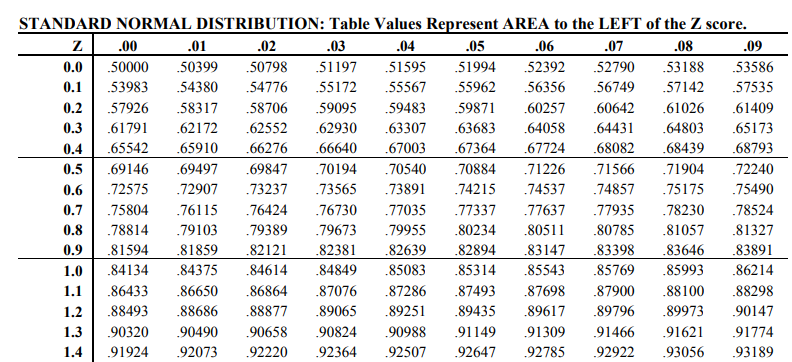

In [343]:
z_table = []
with open("./data/z-table-copy-paste.txt", "r") as file:
    for line in file:
        row = list(map(float, line.split()))
        del row[0]
        print(row)
        
        z_table.append(row)

[0.5, 0.50399, 0.50798, 0.51197, 0.51595, 0.51994, 0.52392, 0.5279, 0.53188, 0.53586]
[0.53983, 0.5438, 0.54776, 0.55172, 0.55567, 0.55962, 0.56356, 0.56749, 0.57142, 0.57535]
[0.57926, 0.58317, 0.58706, 0.59095, 0.59483, 0.59871, 0.60257, 0.60642, 0.61026, 0.61409]
[0.61791, 0.62172, 0.62552, 0.6293, 0.63307, 0.63683, 0.64058, 0.64431, 0.64803, 0.65173]
[0.65542, 0.6591, 0.66276, 0.6664, 0.67003, 0.67364, 0.67724, 0.68082, 0.68439, 0.68793]
[0.69146, 0.69497, 0.69847, 0.70194, 0.7054, 0.70884, 0.71226, 0.71566, 0.71904, 0.7224]
[0.72575, 0.72907, 0.73237, 0.73565, 0.73891, 0.74215, 0.74537, 0.74857, 0.75175, 0.7549]
[0.75804, 0.76115, 0.76424, 0.7673, 0.77035, 0.77337, 0.77637, 0.77935, 0.7823, 0.78524]
[0.78814, 0.79103, 0.79389, 0.79673, 0.79955, 0.80234, 0.80511, 0.80785, 0.81057, 0.81327]
[0.81594, 0.81859, 0.82121, 0.82381, 0.82639, 0.82894, 0.83147, 0.83398, 0.83646, 0.83891]
[0.84134, 0.84375, 0.84614, 0.84849, 0.85083, 0.85314, 0.85543, 0.85769, 0.85993, 0.86214]
[0.86433, 0.8

In [344]:
# leetcode: 74. Search a 2D matrix
# binary search on rows and columns: O(log m + log n)
def get_z_score(z_table, target): 
    ROWS, COLS = len(z_table), len(z_table[0])

    # Binary search on rows
    top, bot = 0, ROWS - 1
    while top <= bot:
        row = (top + bot) // 2
        if target > z_table[row][-1]:
            top = row + 1
        elif target < z_table[row][0]:
            bot = row - 1
        else:
            break
    
    if not (top <= bot):
        raise ValueError("Target value not found in Z-Table")
    
    # Binary search on columns
    l, r = 0, COLS - 1
    while l <= r:
        m = (l + r) // 2
        if target > z_table[row][m]:
            l = m + 1
        elif target < z_table[row][m]:
            r = m - 1 
        else:
            return round(row/10 + m/100, 2)
    return False

get_z_score(z_table, .99955)

3.32

In [345]:
# Calculate Confidence Interval
mean = 8_978_814.2
confidence = 0.95
alpha = 1 - confidence
critical_probability = 1 - (alpha / 2)
z_score = get_z_score(z_table, critical_probability )
population_sd = 1_247_1425.74
sample_size = 15
SEM = population_sd / sqrt(sample_size)
MOE = z_score * SEM
print(f"Confidence interval: ({round(mean - MOE, 2)}, {round(mean + MOE, 2)})")


Confidence interval: (2667401.97, 15290226.43)


In [346]:
def get_z_confidence_interval(data, confidence=95):
    if confidence not in [90, 95, 99]:
        raise ValueError("Confidence level must be one of 90, 95 or 99")

    sample_mean = custom_mean(data)
    sd = custom_stdev(data) # population stddev
    sample_size = len(data)

    alpha = 1 - (confidence / 100)
    critical_probability = 1 - (alpha / 2)
    z_score = get_z_score(z_table, critical_probability)
    MOE = z_score * (sd / sqrt(sample_size))

    lower_bound = round(sample_mean - MOE, 2)
    upper_bound = round(sample_mean + MOE, 2)
    return (lower_bound, upper_bound)

# Calculate the Houston Rockets salary confidence interval
salary_list = [38178000, 37800000, 14057730, 11301219, 8349039, 3540000,
               2564753, 2564753, 2174318, 2028594, 1845301, 903111,
               8111447, 695526, 568422]

get_z_confidence_interval(
    data=salary_list,
    confidence=95
)

(2667401.97, 15290226.43)

#### Confidence Interval - `T-Table`

In [347]:
with open("./data/t-table-copy-paste.txt") as f:
    t_table = {}
    for line in f:
        unnecessary_lines = ['one-tail', 'two-tails', 'df', 'z', '0%']
        if line.split()[0] in unnecessary_lines:
            # Removing unnecessary lines
            del line
        elif line.split()[0] == 'cum.':
            # Getting only the values in cum. prob
            cum_prob = line.split()[3:]
            cum_prob_mod = [float(i) for i in cum_prob if i != 't'] 
            t_table["cum_prob"] = [float(i) for i in cum_prob if i != 't'] 
        else:
            df = int(line.split()[0])
            values = [float(i) for i in line.split()[1:]]
            t_table[df] = values
        


In [348]:
for k, v in t_table.items():
    print(k, v)

cum_prob [0.5, 0.75, 0.8, 0.85, 0.9, 0.95, 0.975, 0.99, 0.995, 0.999, 0.9995]
1 [0.0, 1.0, 1.376, 1.963, 3.078, 6.314, 12.71, 31.82, 63.66, 318.31, 636.62]
2 [0.0, 0.816, 1.061, 1.386, 1.886, 2.92, 4.303, 6.965, 9.925, 22.327, 31.599]
3 [0.0, 0.765, 0.978, 1.25, 1.638, 2.353, 3.182, 4.541, 5.841, 10.215, 12.924]
4 [0.0, 0.741, 0.941, 1.19, 1.533, 2.132, 2.776, 3.747, 4.604, 7.173, 8.61]
5 [0.0, 0.727, 0.92, 1.156, 1.476, 2.015, 2.571, 3.365, 4.032, 5.893, 6.869]
6 [0.0, 0.718, 0.906, 1.134, 1.44, 1.943, 2.447, 3.143, 3.707, 5.208, 5.959]
7 [0.0, 0.711, 0.896, 1.119, 1.415, 1.895, 2.365, 2.998, 3.499, 4.785, 5.408]
8 [0.0, 0.706, 0.889, 1.108, 1.397, 1.86, 2.306, 2.896, 3.355, 4.501, 5.041]
9 [0.0, 0.703, 0.883, 1.1, 1.383, 1.833, 2.262, 2.821, 3.25, 4.297, 4.781]
10 [0.0, 0.7, 0.879, 1.093, 1.372, 1.812, 2.228, 2.764, 3.169, 4.144, 4.587]
11 [0.0, 0.697, 0.876, 1.088, 1.363, 1.796, 2.201, 2.718, 3.106, 4.025, 4.437]
12 [0.0, 0.695, 0.873, 1.083, 1.356, 1.782, 2.179, 2.681, 3.055, 3.93,

In [349]:
def get_t_score(t_table, cum_prob, sample_size):
    # Getting indices of cum_prob in T-Table
    cum_prob_idx = {}  
    for i, n in enumerate(t_table["cum_prob"]):
        cum_prob_idx[n] = i 
    
    target_col = cum_prob_idx[cum_prob]
    df = sample_size - 1

    return t_table[df][target_col]

get_t_score(
    t_table=t_table,
    cum_prob=0.975,
    sample_size=101
)

1.984

In [350]:
def get_t_confidence_interval(data, confidence=95):
    if confidence not in [90, 95, 99]:
        raise ValueError("Confidence level must be one of 90, 95 or 99")

    sample_mean = custom_mean(data)
    sd = custom_stdev(data) # sample stddev
    sample_size = len(data)

    alpha = 1 - (confidence / 100)
    critical_probability = 1 - (alpha / 2)
    t_score = get_t_score(t_table, critical_probability, sample_size)
    MOE = t_score * (sd / sqrt(sample_size))

    lower_bound = round(sample_mean - MOE, 2)
    upper_bound = round(sample_mean + MOE, 2)
    return (lower_bound, upper_bound)


# Problem Statement:
# A manufacturer is promising that the break tires for 
# cars are gonna last for 65k km with 95% confidence interval
break_pad_kms = [
    58500, 58700, 62800, 57220, 62750, 
    59370, 57720, 60920, 61910, 59260, 
    63550, 60520, 58710, 57340, 60660, 
    57750, 60430, 60050, 62970, 58870
]

get_t_confidence_interval(
    data=break_pad_kms,
    confidence=95
)
# CI = (59069.51, 60930.49). 
# We got [59k km, 60k km]. So he was wrong when he
# said that the life span of the brake pads is 65k km

(59069.51, 60930.49)

- The 95% confidence interval for the mean lifespan of the brake pads, based on the provided sample data, is approximately (59069.50, 60930.50) kilometers. 

- This means we can be 95% confident that the true mean lifespan of the brake pads falls within this range.

In [351]:
get_z_confidence_interval(
    data=break_pad_kms,
    confidence=95
)

(59128.64, 60871.36)